Breast Cancer Detection using CNN

Πρόβλημα:
Ο καρκίνος του μαστού είναι μια από τις κύριες αιτίες θανάτου στις γυναίκες παγκοσμίως. Η έγκαιρη διάγνωση μέσω μαστογραφίας παίζει καθοριστικό ρόλο στη βελτίωση της πρόγνωσης και της θεραπείας. Ωστόσο, η ανάλυση των μαστογραφικών εικόνων είναι μια πρόκληση, καθώς απαιτεί υψηλή εξειδίκευση και μπορεί να επηρεάζεται από υποκειμενικούς παράγοντες. Η χρήση μεθόδων βαθιάς μάθησης, όπως οι Συνελικτών Νευρωνικών Δικτύων (CNN), μπορεί να αυτοματοποιήσει τη διαδικασία διάγνωσης, βελτιώνοντας την ακρίβεια και μειώνοντας την πιθανότητα ανθρώπινου σφάλματος.

Στην εργασία αυτή, θα αναλύσουμε το πρόβλημα της ανίχνευσης καρκίνου του μαστού μέσω μαστογραφίας, χρησιμοποιώντας μεθόδους Βαθιάς Μάθησης (Deep Learning), συγκεκριμένα Συνελικτών Νευρωνικά Δίκτυα (CNN). Η βασική πρόκληση είναι η ακριβής ανίχνευση των παθολογικών περιοχών στις μαστογραφικές εικόνες, κάτι που απαιτεί εξαιρετική ακρίβεια και εξειδίκευση. Χρησιμοποιώντας το σύνολο δεδομένων CBIS-DDSM, το οποίο περιλαμβάνει μαστογραφικές εικόνες με πληροφορίες διάγνωσης, θα εκπαιδεύσουμε και θα αξιολογήσουμε ένα CNN μοντέλο για την αναγνώριση και ταξινόμηση των εικόνων σε κατηγορίες όπως φυσιολογικές, καλοήθεις και κακοήθεις. Το έργο αυτό στοχεύει να συνεισφέρει στη βελτίωση των διαγνωστικών εργαλείων και της κλινικής πρακτικής μέσω της αυτοματοποίησης της διαδικασίας διάγνωσης.

Η εργασία θα χώριστει σε βήματα 




Βήμα 1: Φόρτωση Δεδομένων (Load Data)



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.426013102412536473840491086280519425818/1-223.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.16568542011655175430071162144126831780/2-089.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.16568542011655175430071162144126831780/1-111.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.116437756113164247142539498550746659420/1-051.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.116437756113164247142539498550746659420/2-203.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.265953197912973660327069359641506533925/1-288.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295670217913556255928452747763741622478/1-213.jpg
/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.

In [3]:
import os
import gc
import PIL
import cv2
import uuid
import shutil
import random
import glob as gb
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from tqdm import tqdm  # Progress bar
from scipy.special import gamma

import keras
from keras.optimizers import *
from keras.regularizers import l1_l2
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import LearningRateScheduler
from keras.layers import Conv2D, MaxPool2D, BatchNormalization

from tensorflow.keras.metrics import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Function to get the version of a module if it exists
def get_version(module):
    try:
        return module.__version__
    except AttributeError:
        return "Version info not available"

# Print versions of each module
print("os:", os.__version__ if hasattr(os, '__version__') else "OS version not available")
print("gc:", get_version(gc))
print("PIL:", get_version(PIL))
print("cv2:", cv2.__version__)
print("uuid:", get_version(uuid))
print("shutil:", get_version(shutil))
print("random:", get_version(random))
print("glob:", get_version(gb))
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("tensorflow:", tf.__version__)
import matplotlib
print("matplotlib:", matplotlib.__version__)
import tqdm
print("tqdm:", tqdm.__version__)
import scipy
print("scipy:", scipy.__version__)
print("keras:", keras.__version__)
print("tensorflow:", tf.__version__)
import sklearn
print("sklearn:", sklearn.__version__)  # sklearn version

os: OS version not available
gc: Version info not available
PIL: 11.0.0
cv2: 4.10.0
uuid: Version info not available
shutil: Version info not available
random: Version info not available
glob: Version info not available
numpy: 1.26.4
pandas: 2.2.3
tensorflow: 2.17.1
matplotlib: 3.7.5
tqdm: 4.67.1
scipy: 1.13.1
keras: 3.5.0
tensorflow: 2.17.1
sklearn: 1.2.2


In [4]:
path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset"

for files in os.listdir(path):
    files_dir = os.path.join(path, files)


    if files == 'jpeg':   # to pass 6774 files 
        pass
    else:
        for file in os.listdir(files_dir):
            print(file)

dicom_info.csv
mass_case_description_train_set.csv
calc_case_description_train_set.csv
meta.csv
calc_case_description_test_set.csv
mass_case_description_test_set.csv


In [5]:
dicom_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv")
dicom_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [6]:
dicom_df.describe().T

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


count          mean           std           min  \
AccessionNumber              0.0           NaN           NaN           NaN   
BitsAllocated            10237.0  1.321246e+01      3.812001  8.000000e+00   
BitsStored               10237.0  1.321246e+01      3.812001  8.000000e+00   
Columns                  10237.0  2.179893e+03   1374.221082  6.800000e+01   
ContentDate              10237.0  2.016047e+07    111.049745  2.016041e+07   
ContentTime              10237.0  1.230613e+05  11391.443116  8.275551e+04   
HighBit                  10237.0  1.221246e+01      3.812001  7.000000e+00   
InstanceNumber           10237.0  1.000000e+00      0.000000  1.000000e+00   
LargestImagePixelValue   10237.0  4.261229e+04  30995.808636  2.550000e+02   
PatientBirthDate             0.0           NaN           NaN           NaN   
PatientSex                   0.0           NaN           NaN           NaN   
PixelRepresentation      10237.0  0.000000e+00      0.000000  0.000000e+00   
ReferringPhysicianName       0.0           NaN           NaN           NaN   
Rows                     10237.0  3.549779e+03   2363.196643  7.300000e+01   
SamplesPerPixel          10237.0  1.000000e+00      0.000000  1.000000e+00   
SeriesNumber             10237.0  1.000000e+00      0.000000  1.000000e+00   
SmallestImagePixelValue  10237.0  9.294026e+03  15367.554560  0.000000e+00   
StudyDate                 9671.0  2.016440e+07   4831.297763  2.016072e+07   
StudyTime                 9671.0  1.578644e+05  51545.806583  8.223500e+04   

                                  25%           50%           75%  \
AccessionNumber                   NaN           NaN           NaN   
BitsAllocated            8.000000e+00  1.600000e+01  1.600000e+01   
BitsStored               8.000000e+00  1.600000e+01  1.600000e+01   
Columns                  4.530000e+02  2.728000e+03  3.112000e+03   
ContentDate              2.016043e+07  2.016050e+07  2.016050e+07   
ContentTime              1.137396e+05  1.229359e+05  1.322114e+05   
HighBit                  7.000000e+00  1.500000e+01  1.500000e+01   
InstanceNumber           1.000000e+00  1.000000e+00  1.000000e+00   
LargestImagePixelValue   2.550000e+02  6.553500e+04  6.553500e+04   
PatientBirthDate                  NaN           NaN           NaN   
PatientSex                        NaN           NaN           NaN   
PixelRepresentation      0.000000e+00  0.000000e+00  0.000000e+00   
ReferringPhysicianName            NaN           NaN           NaN   
Rows                     4.410000e+02  4.624000e+03  5.476000e+03   
SamplesPerPixel          1.000000e+00  1.000000e+00  1.000000e+00   
SeriesNumber             1.000000e+00  1.000000e+00  1.000000e+00   
SmallestImagePixelValue  0.000000e+00  0.000000e+00  1.968700e+04   
StudyDate                2.016072e+07  2.016081e+07  2.017083e+07   
StudyTime                9.074250e+04  1.703350e+05  2.148190e+05   

                                  max  
AccessionNumber                   NaN  
BitsAllocated            1.600000e+01  
BitsStored               1.600000e+01  
Columns                  5.431000e+03  
ContentDate              2.017092e+07  
ContentTime              1.605079e+05  
HighBit                  1.500000e+01  
InstanceNumber           1.000000e+00  
LargestImagePixelValue   6.553500e+04  
PatientBirthDate                  NaN  
PatientSex                        NaN  
PixelRepresentation      0.000000e+00  
ReferringPhysicianName            NaN  
Rows                     7.111000e+03  
SamplesPerPixel          1.000000e+00  
SeriesNumber             1.000000e+00  
SmallestImagePixelValue  5.953800e+04  
StudyDate                2.017093e+07  
StudyTime                2.245020e+05

In [7]:
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [10]:
dicom_df.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [11]:
dicom_df.SeriesDescription.value_counts()

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

In [12]:
cropped_images = dicom_df[dicom_df.SeriesDescription=="cropped images"].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [13]:
full_mammogram = dicom_df[dicom_df.SeriesDescription=="full mammogram images"].image_path
full_mammogram.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [14]:
roi_mask = dicom_df[dicom_df.SeriesDescription=="ROI mask images"].image_path
roi_mask.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [15]:
# # delete dicom_df after finished use it
del dicom_df;    gc.collect()

4

In [16]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)
def plot_smaples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:5]):
        cropped_images_show = PIL.Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,5,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()
correct_dir = "../input/cbis-ddsm-breast-cancer-image-dataset/jpeg"
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", correct_dir)
print('Cropped Images paths:')
print(cropped_images.iloc[0])

Cropped Images paths:
../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg


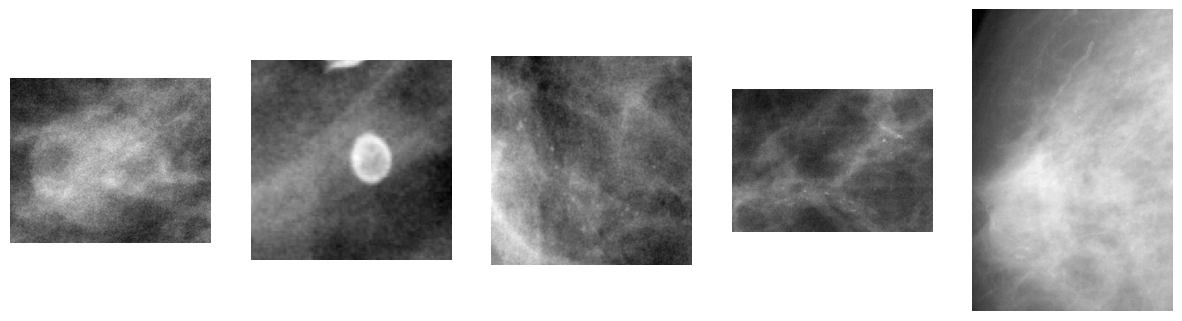

In [19]:
plot_smaples(cropped_images, 15, 15)

In [20]:
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", correct_dir)
print('\nFull mammo Images paths:')
print(full_mammogram.iloc[0])


Full mammo Images paths:
../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg


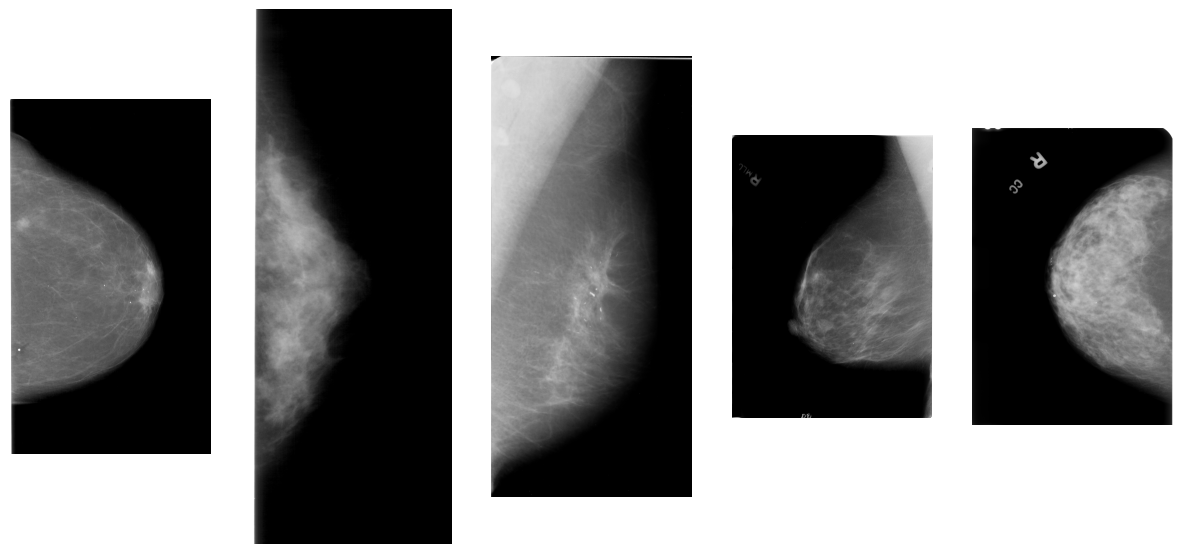

In [21]:
plot_smaples(full_mammogram)

In [22]:
roi_mask = replace_path(roi_mask, "CBIS-DDSM/jpeg", correct_dir)
print('\nROI Mask Images paths:')
print(roi_mask.iloc[0])


ROI Mask Images paths:
../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


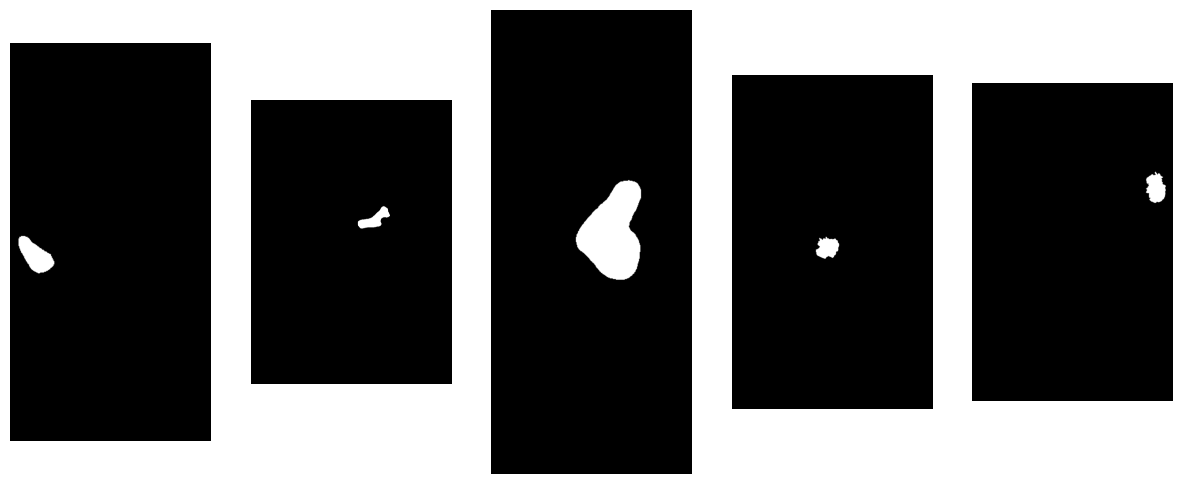

In [23]:
plot_smaples(roi_mask)

In [24]:
def get_image_file_name(data, new_dict):
    """
    /kaggle
    /input
    /cbis-ddsm-breast-cancer-image-dataset
    /jpeg
    /1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304 [5]
    /1-172.jpg
    
    return path at index [5] after split depends on split('\')
    """
    for dicom in data:
        key = dicom.split('/')[4]
#         print(key)
        new_dict[key] = dicom
    print(f"the length of dataset ==> {len(new_dict.keys())}")
cropped_images_dict = dict()
full_mammo_dict = dict()
roi_img_dict = dict()

get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mammo_dict)
get_image_file_name(roi_mask, roi_img_dict)

the length of dataset ==> 3567
the length of dataset ==> 2857
the length of dataset ==> 3247


In [25]:
next(iter((cropped_images.items())))

(0,
 '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')

In [26]:
next(iter((cropped_images_dict.items())))
print()
print(len(cropped_images_dict.keys()))


3567


In [27]:
next(iter((full_mammo_dict.items())))
print()
print(len(full_mammo_dict.keys()))


2857


In [28]:
next(iter((roi_img_dict.items())))
print()
print(len(roi_img_dict.keys()))


3247


In [29]:
del cropped_images, full_mammogram, roi_mask;    gc.collect()

49728

In [30]:
# fix image paths
def fix_image_path(data):
    """Correct dicom paths to correct image paths."""
    for indx, image in enumerate(data.values):
#         print(f"Image Path: {image[11]}")

        img_name = image[11].split('/')[2]
#         print(f"Looking for key: {img_name}")  # Debugging step

        if img_name in full_mammo_dict:
            data.iloc[indx, 11] = full_mammo_dict[img_name]
        else:
            data.iloc[indx, 11] = None
#             print(f"KeyError: '{img_name}' not found in full_mammo_dict")  # Debugging step
        
        img_name = image[12].split('/')[2]
        if img_name in cropped_images_dict:
            data.iloc[indx, 12] = cropped_images_dict[img_name]
        else:
            data.iloc[indx, 11] = None
            # print(f"KeyError: '{img_name}' not found in cropped_images_dict")  # Debugging step

        img_name = image[13].split('/')[2]
        if img_name in roi_img_dict:
            data.iloc[indx, 13] = roi_img_dict[img_name]

        else:
            data.iloc[indx, 13] = None
mass_train = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv")
mass_test  = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv")
mass_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [31]:
mass_train.iloc[:, 11].head()

0    Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1    Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2    Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3    Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4    Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...
Name: image file path, dtype: object

In [32]:
fix_image_path(mass_train)
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [33]:
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'image view': 'image_view',
                                        'abnormality id': 'abnormality_id',
                                        'abnormality type': 'abnormality_type',
                                        'mass shape': 'mass_shape',
                                        'mass margins': 'mass_margins',
                                        'image file path': 'image_file_path',
                                        'cropped image file path': 'cropped_image_file_path',
                                        'ROI mask file path': 'ROI_mask_file_path'})
mass_train.head(5)

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape   mass_margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped_image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI_mask_file_path  
0  ../input/cbis-ddsm-breast-cancer-image-dataset...  
1  ../input/cbis-ddsm-breast-cancer-image-dataset...  
2  ../input/cbis-ddsm-breast-cancer-image-dataset...  
3  ../input/cbis-ddsm-breast-cancer-image-dataset...  
4  ../input/cbis-ddsm-breast-cancer-image-dataset...

In [34]:
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [35]:
mass_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...   
3  Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...   
4  Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...   

                             cropped image file path  \
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....   
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

In [36]:
mass_train.iloc[:, 11].head()

0    ../input/cbis-ddsm-breast-cancer-image-dataset...
1    ../input/cbis-ddsm-breast-cancer-image-dataset...
2    ../input/cbis-ddsm-breast-cancer-image-dataset...
3    ../input/cbis-ddsm-breast-cancer-image-dataset...
4    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: image_file_path, dtype: object

In [37]:
fix_image_path(mass_test)
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
# view renamed columns
mass_test.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality_type mass_shape   mass_margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped_image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI_mask_file_path  
0  ../input/cbis-ddsm-breast-cancer-image-dataset...  
1  ../input/cbis-ddsm-breast-cancer-image-dataset...  
2  ../input/cbis-ddsm-breast-cancer-image-dataset...  
3  ../input/cbis-ddsm-breast-cancer-image-dataset...  
4  ../input/cbis-ddsm-breast-cancer-image-dataset...

In [56]:
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [57]:
calc_train = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv")
calc_test  = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv")
calc_train.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [58]:
calc_train.iloc[:,11].head()

0    Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...
1    Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...
2    Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...
3    Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...
4    Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...
Name: image file path, dtype: object

In [59]:
calc_train = calc_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'image view': 'image_view',
                                        'abnormality id': 'abnormality_id',
                                        'abnormality type': 'abnormality_type',
                                        'mass shape': 'mass_shape',
                                        'mass margins': 'mass_margins',
                                        'image file path': 'image_file_path',
                                        'cropped image file path': 'cropped_image_file_path',
                                        'ROI mask file path': 'ROI_mask_file_path'})
# view renamed columns
calc_train.head()

patient_id  breast density left_or_right_breast image_view  abnormality_id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality_type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image_file_path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped_image_file_path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI_mask_file_path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [60]:
fix_image_path(calc_train)
calc_test.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   

  abnormality type             calc type calc distribution  assessment  \
0    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2    calcification              VASCULAR               NaN           2   
3    calcification              VASCULAR               NaN           2   
4    calcification              VASCULAR               NaN           2   

                 pathology  subtlety  \
0                   BENIGN         2   
1                   BENIGN         2   
2  BENIGN_WITHOUT_CALLBACK         5   
3  BENIGN_WITHOUT_CALLBACK         5   
4  BENIGN_WITHOUT_CALLBACK         5   

                                     image file path  \
0  Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
3  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
4  Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                             cropped image file path  \
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....   
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....   
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                  ROI mask file path  
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....  
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....  
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...

In [62]:
calc_test.iloc[:,11].head()

0    Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...
1    Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...
2    Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...
3    Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...
4    Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...
Name: image file path, dtype: object

In [63]:
calc_test = calc_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
# view renamed columns
calc_test.head()

patient_id  breast density left_or_right_breast image_view  abnormality_id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   

  abnormality_type             calc type calc distribution  assessment  \
0    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2    calcification              VASCULAR               NaN           2   
3    calcification              VASCULAR               NaN           2   
4    calcification              VASCULAR               NaN           2   

                 pathology  subtlety  \
0                   BENIGN         2   
1                   BENIGN         2   
2  BENIGN_WITHOUT_CALLBACK         5   
3  BENIGN_WITHOUT_CALLBACK         5   
4  BENIGN_WITHOUT_CALLBACK         5   

                                     image_file_path  \
0  Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
3  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
4  Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                             cropped_image_file_path  \
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....   
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....   
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                  ROI_mask_file_path  
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....  
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....  
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...

In [64]:
fix_image_path(calc_test)


In [65]:
print(f'Shape of mass_train: {calc_train.shape}')
print(f'Shape of mass_test: {calc_test.shape}')

Shape of mass_train: (1546, 14)
Shape of mass_test: (326, 14)


Full Mammograms:

(4808, 3024, 3)
(4800, 2656, 3)
(5491, 2986, 3)
(5491, 3046, 3)
(5491, 2911, 3)


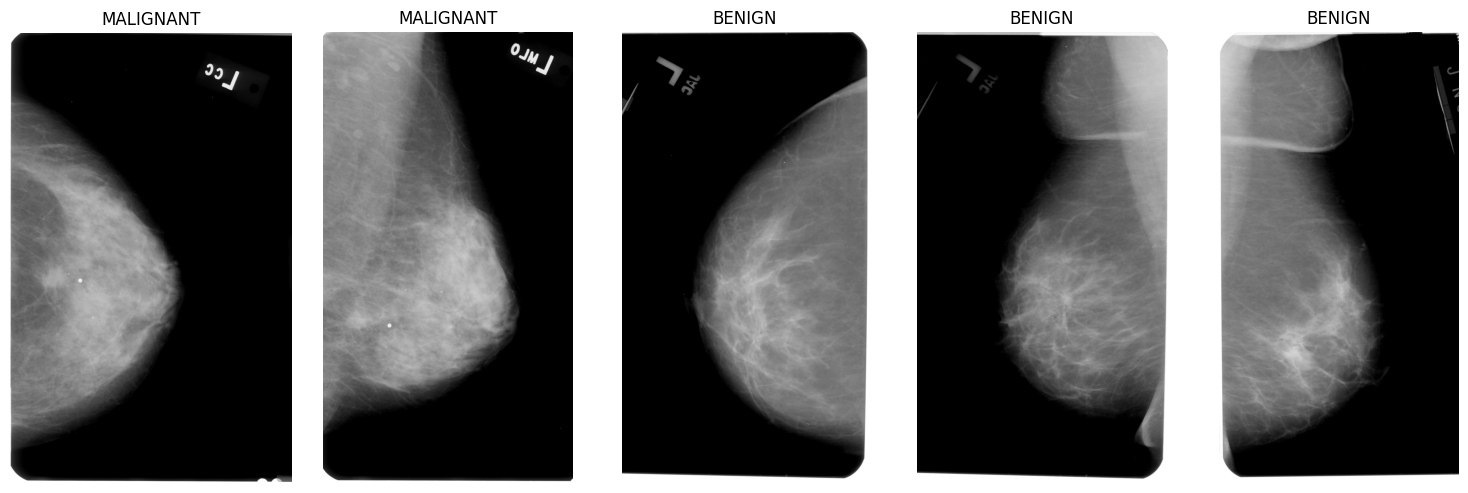

Cropped Mammograms:

(515, 431, 3)
(292, 256, 3)
(466, 423, 3)
(427, 422, 3)
(399, 465, 3)


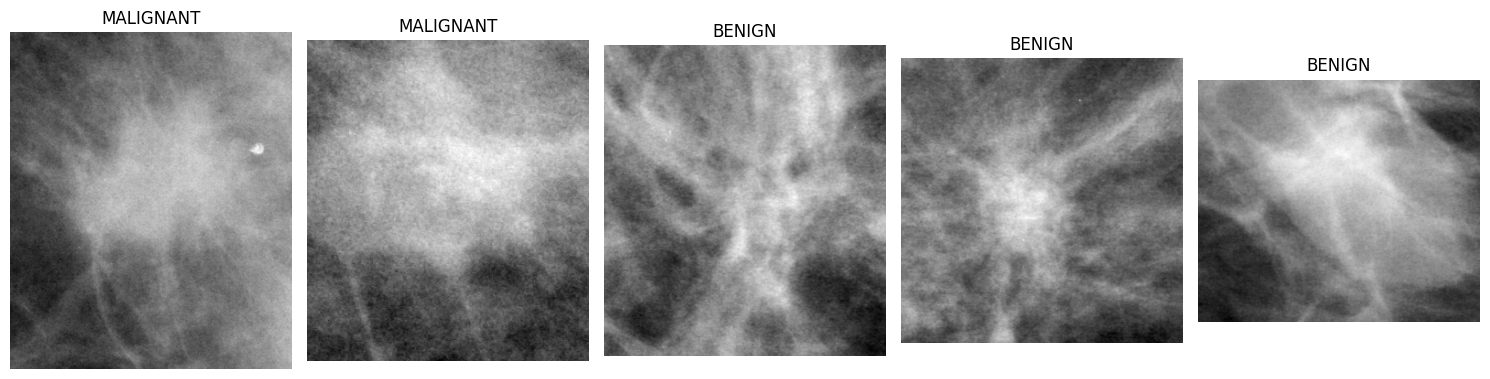

ROI_mask:

(4808, 3024, 3)
(4800, 2656, 3)
(5491, 2986, 3)
(5491, 3046, 3)
(5491, 2911, 3)


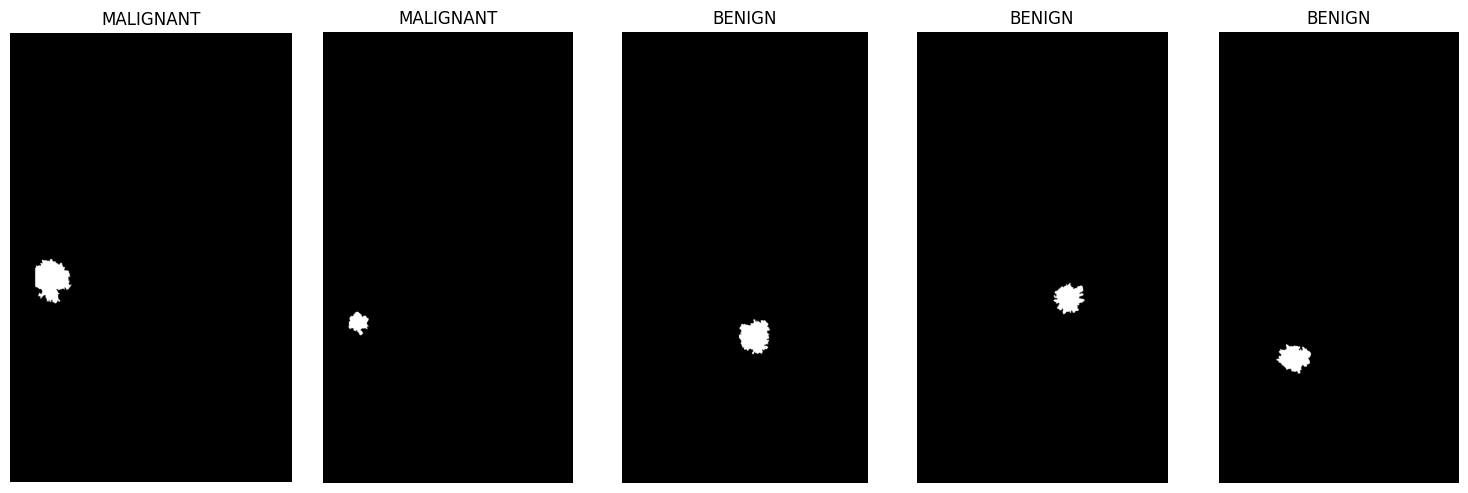

In [66]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

def display_images(dataset, column, number):
    """Displays images in dataset, handling missing files and converting formats."""
    
    # create figure and axes
    fig, axes = plt.subplots(1, number, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, (i, row) in enumerate(dataset.head(number).iterrows()):
        image_path = row[column]
        
       # Check if image_path is valid (not None) and exists
        if image_path is None or not os.path.exists(image_path):
            # print(f"File not found or invalid path: {image_path}")
            continue
        
        image = cv2.imread(image_path)
        
        # Handle case when image can't be read
        if image is None:
            # print(f"Error reading image: {image_path}")
            continue
        
        # Convert BGR to RGB if needed (for correct color display)
        if len(image.shape) == 3 and image.shape[2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax = axes[index]
        ax.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
        print(np.array(image).shape)
    
    plt.tight_layout()
    plt.show()
print('Full Mammograms:\n')
display_images(mass_train, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(mass_train, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(mass_train, 'ROI_mask_file_path', 5)

Full Mammograms:

(4006, 1846, 3)
(5491, 2011, 3)
(5904, 3200, 3)
(5952, 3352, 3)
(5116, 2641, 3)


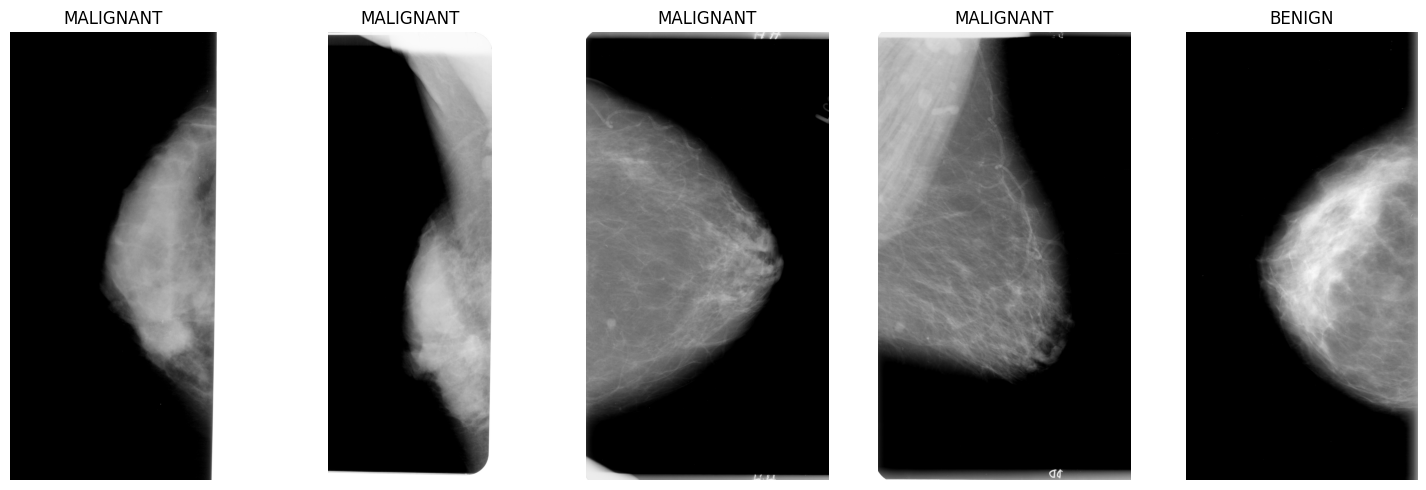

Cropped Mammograms:

(384, 385, 3)
(369, 328, 3)
(214, 195, 3)
(220, 225, 3)
(405, 376, 3)


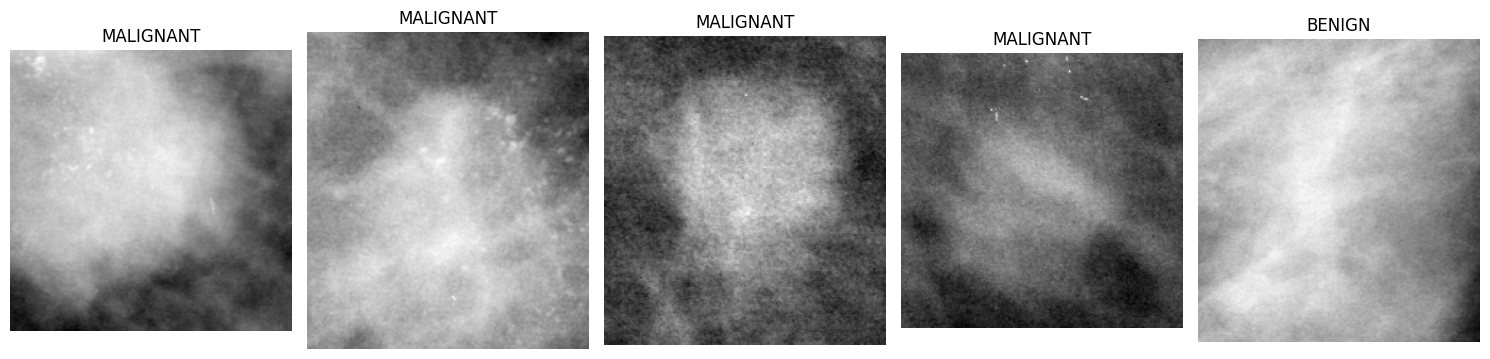

ROI_mask:

(4006, 1846, 3)
(5491, 2011, 3)
(5904, 3200, 3)
(5952, 3352, 3)
(5116, 2641, 3)


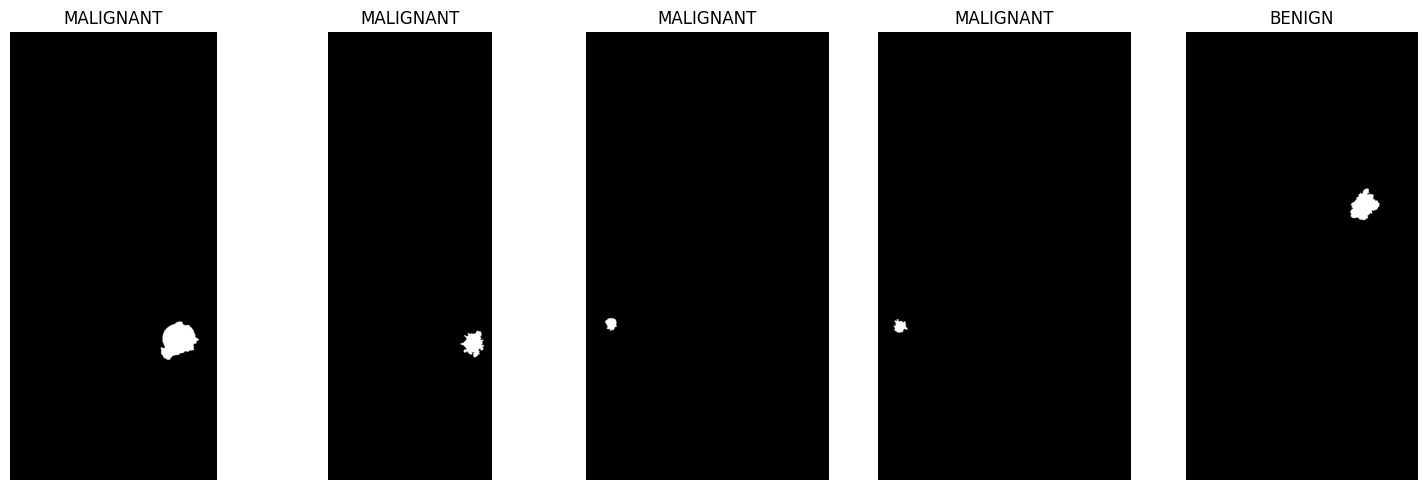

In [68]:
print('Full Mammograms:\n')
display_images(mass_test, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(mass_test, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(mass_test, 'ROI_mask_file_path', 5)

Full Mammograms:

(5056, 2761, 3)
(5386, 2836, 3)
(5356, 2986, 3)
(5491, 3166, 3)
(4568, 3064, 3)


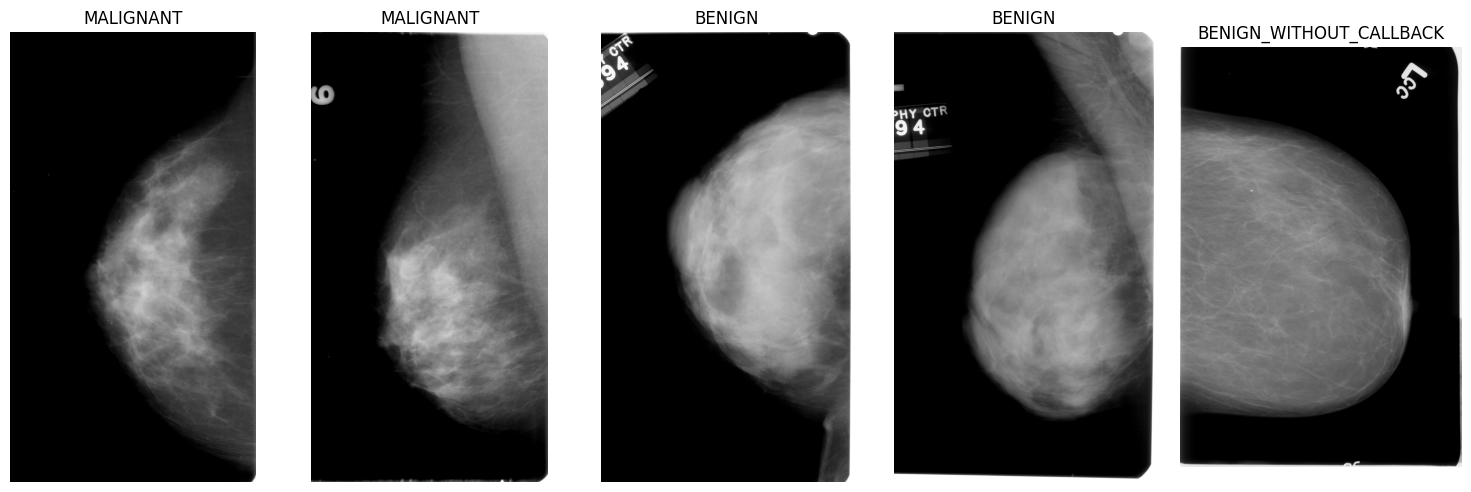

Cropped Mammograms:

(589, 677, 3)
(549, 681, 3)
(681, 577, 3)
(689, 761, 3)
(161, 177, 3)


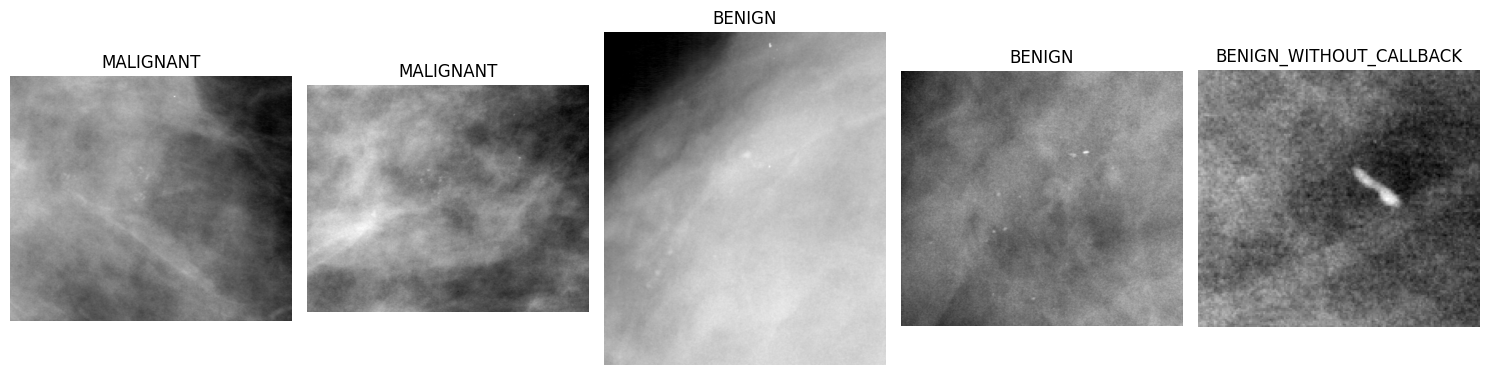

ROI_mask:

(5056, 2761, 3)
(5386, 2836, 3)
(5356, 2986, 3)
(5491, 3166, 3)
(4568, 3064, 3)


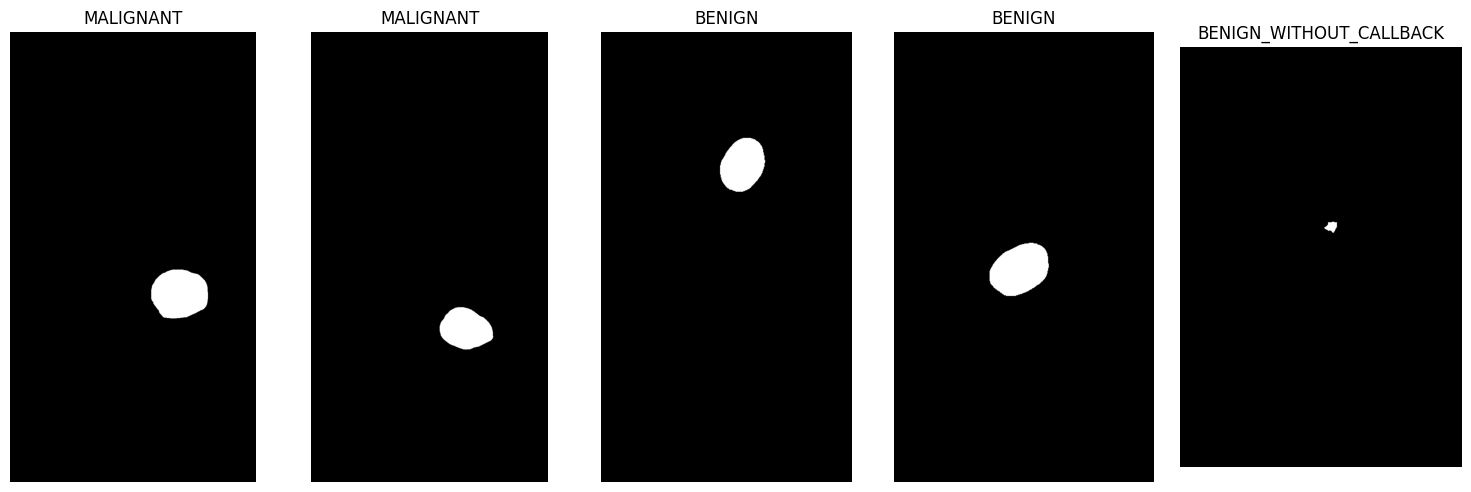

In [69]:
print('Full Mammograms:\n')
display_images(calc_train, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(calc_train, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(calc_train, 'ROI_mask_file_path', 5)

Full Mammograms:



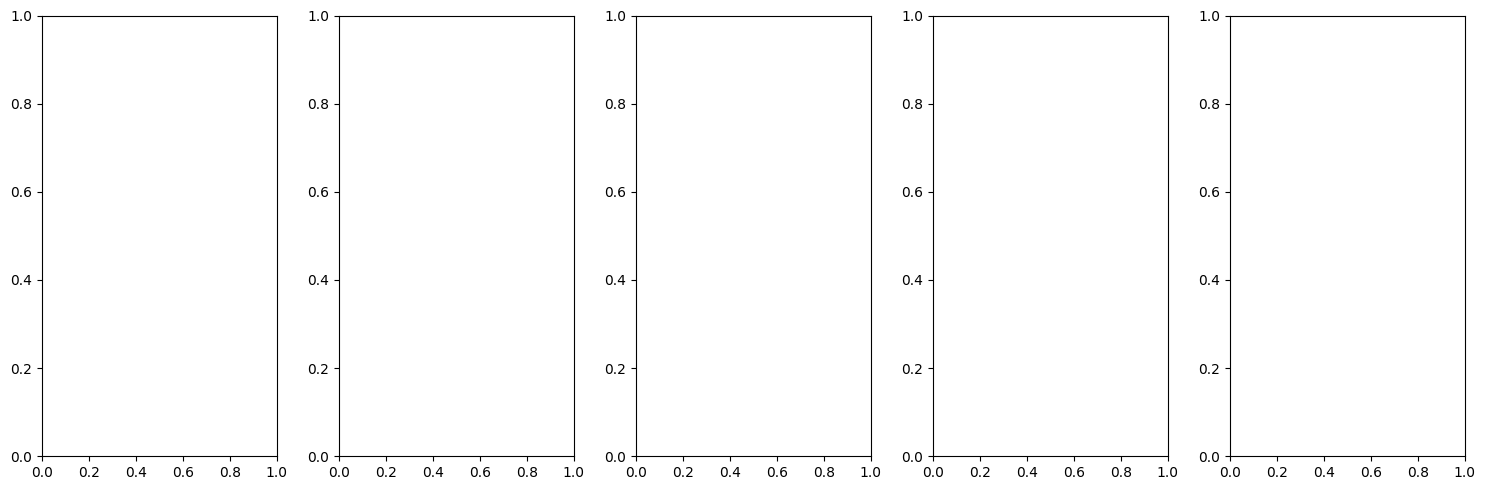

Cropped Mammograms:

(249, 265, 3)
(265, 249, 3)
(409, 660, 3)
(257, 724, 3)
(809, 833, 3)


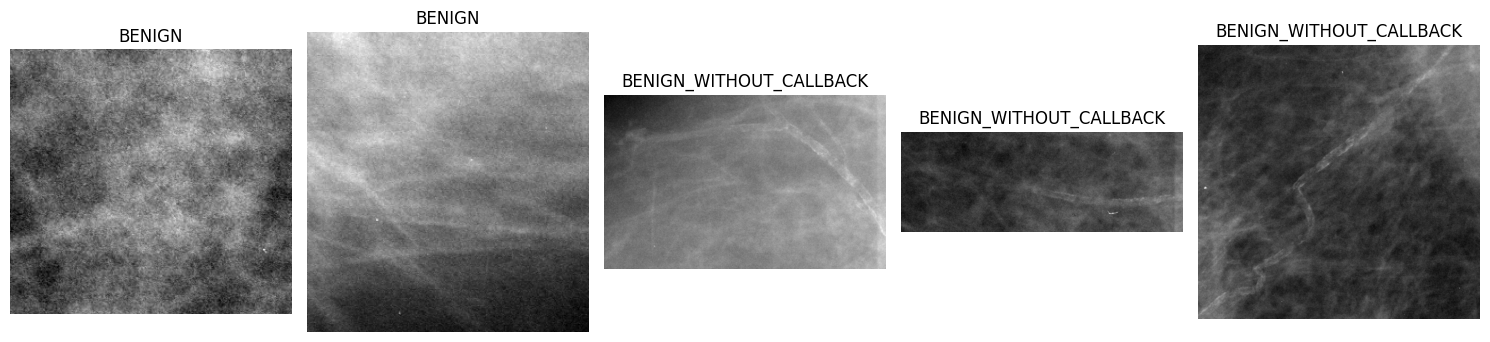

ROI_mask:



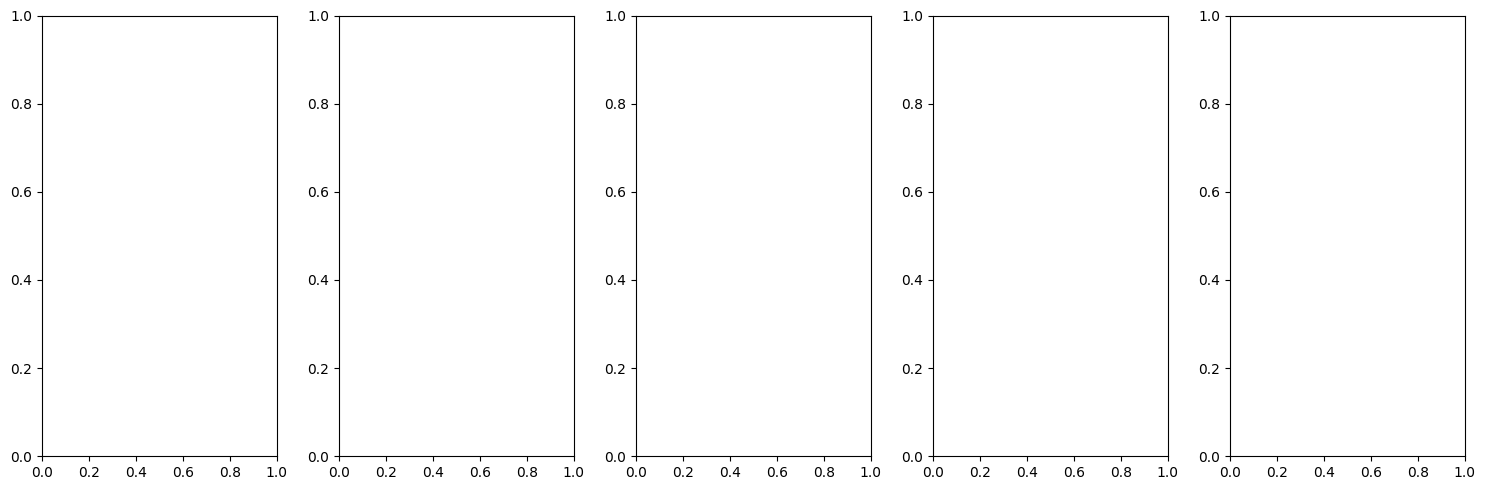

In [70]:
print('Full Mammograms:\n')
display_images(calc_test, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(calc_test, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(calc_test, 'ROI_mask_file_path', 5)

In [85]:
full_dataset = pd.concat([calc_train, calc_test], axis=0)


NameError: name 'calc_train' is not defined

In [84]:
del mass_train, mass_test, calc_train, calc_test;    gc.collect()

NameError: name 'mass_train' is not defined

In [87]:
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 
target_size = (224, 224, 3)
full_dataset['labels'] = full_dataset['pathology'].replace(class_mapper).infer_objects(copy=False)

full_images = np.array(full_dataset[full_dataset["image_file_path"].notna()]["image_file_path"].tolist())
full_labels = np.array(full_dataset[full_dataset["image_file_path"].notna()]["labels"].tolist())

<ipython-input-87-802b1d4151d0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_dataset['labels'] = full_dataset['pathology'].replace(class_mapper).infer_objects(copy=False)


In [88]:
len(full_images)


1588

In [89]:
full_labels_series = pd.Series(full_labels)

# Count the occurrences of each class
label_counts = full_labels_series.value_counts()

# Assuming 0 = benign and 1 = malignant
benign_count = label_counts.get(0, 0)
malignant_count = label_counts.get(1, 0)

print(f"Benign images: {benign_count}")
print(f"Malignant images: {malignant_count}")

Benign images: 1018
Malignant images: 570


In [90]:
num_classes = len(full_dataset['labels'].unique())
num_classes

2

In [91]:
class_names = ['Benign', 'Malignant']
dir_path = '/kaggle/working/'

# # Loop through all files and subdirectories in the working directory
for filename in os.listdir(dir_path):
    file_path = os.path.join(dir_path, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # Remove the file or symbolic link
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # Remove the directory and its contents
    except Exception as e:
        print(f'Failed to delete {file_path}. Reason: {e}')

print("All files and subdirectories in '/kaggle/working/' have been removed.")

All files and subdirectories in '/kaggle/working/' have been removed.


In [92]:
def images_count():
    zero_class_count = len(os.listdir("/kaggle/working/merged_images/0"))
    one_class_count  = len(os.listdir("/kaggle/working/merged_images/1"))

    print(f"Number of images in class 0: {zero_class_count}")
    print(f"Number of images in class 1: {one_class_count}")
def augment_image(image):
    # Apply data augmentation using tf.image functions
    image = tf.image.random_flip_left_right(image)
#     image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image

# Function to resize image to (224, 224, 3)
def resize_image(image_tensor):
    return tf.image.resize(image_tensor, [224, 224])

# Function to balance classes by augmenting images
def copy_images_with_unique_filenames(images, labels, source, destination, target_count=None):
    """
    Copy images from source to destination in subfolders '0' and '1',
    ensuring unique filenames and applying data augmentation and balancing.
    """
    benign_images = 0
    malignant_images = 0
    skipped_images = []

    # Create the destination subfolders '0' and '1'
    category_dest_dir_zero = os.path.join(destination, '0')
    os.makedirs(category_dest_dir_zero, exist_ok=True)

    category_dest_dir_one = os.path.join(destination, '1')
    os.makedirs(category_dest_dir_one, exist_ok=True)

    benign_images_list = []
    malignant_images_list = []

    for i, (image, label) in enumerate(zip(images, labels)):
#         img_name = data_frame.REFNUM[i]
#         abs_path = os.path.join(source, img_name + '.pgm')

        if os.path.exists(image):
            try:
                # Generate a unique filename
                filename = os.path.basename(image)
                unique_filename = f"{uuid.uuid4().hex}_{filename}"
        
                # Open the image using PIL
                with Image.open(image) as img:
                    # Convert the image to RGB mode (for saving as JPEG)
                    img = img.convert('RGB')
                    # Augment the image (convert it to a Tensor first)
                    img_tensor = tf.convert_to_tensor(img)
                    # Resize the image to (224, 224, 3)
                    resized_img_tensor = resize_image(img_tensor)
                    augmented_image_tensor = augment_image(resized_img_tensor)
                    # Convert Tensor back to PIL image for saving
                    augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)

                    if label == 0:
                        benign_images_list.append(unique_filename)
                        dest_path = os.path.join(category_dest_dir_zero, unique_filename)
#                         augmented_image.save(dest_path, 'JPEG')
                        augmented_image.save(dest_path, 'JPEG')
                        benign_images += 1

                    elif label == 1:
                        malignant_images_list.append(unique_filename)
                        dest_path = os.path.join(category_dest_dir_one, unique_filename)
#                         augmented_image.save(dest_path, 'JPEG')
                        augmented_image.save(dest_path, 'JPEG')
                        malignant_images += 1
                        
#                 del img, img_tensor, resized_img_tensor, augmented_image_tensor, augmented_image
#                 gc.collect()
            except Exception as e:
                print(f"Error copying image {image}: {e}")
                skipped_images.append(image)
        else:
            print(f"Image not found: {image}")
            skipped_images.append(image)

    # If balancing is needed, duplicate/augment images from the smaller class
    benign_count = len(benign_images_list)
    malignant_count = len(malignant_images_list)

    if benign_count < malignant_count:
#         augment_and_save_images(benign_images_list, category_dest_dir_zero, target_count - benign_count)
        augment_and_save_images(benign_images_list, category_dest_dir_zero, malignant_count - benign_count)

    elif malignant_count < benign_count:
        augment_and_save_images(malignant_images_list, category_dest_dir_one, benign_count - malignant_count)
    print("data balancing")
    images_count()
    augment_and_save_images(benign_images_list, category_dest_dir_zero, target_count)
    augment_and_save_images(malignant_images_list, category_dest_dir_one, target_count)
    print("data augmentation")
    images_count()
    
    print(f"\nCopying complete.")
    print(f"Benign images copied (label 0): {benign_images}")
    print(f"Benign count (label 0): {benign_count}")
    print(f"Malignant images copied (label 1): {malignant_images}")
    print(f"Malignant count (label 1): {malignant_count}")
    print(f"Total skipped images: {len(skipped_images)}")
    if skipped_images:
        print("Skipped images:")
        for img in skipped_images:
            print(img)
            
    del skipped_images, benign_images_list, malignant_images_list
    gc.collect()

# Function to augment and save images to balance the dataset
def augment_and_save_images(images_list, destination_dir, num_augments):
    """
    Augment and save images to balance the dataset.
    """
    for i in range(num_augments):
        img_name = random.choice(images_list)
        abs_path = os.path.join(destination_dir, img_name)

        try:
            with Image.open(abs_path) as img:
                img = img.convert('RGB')
                # Augment the image
                img_tensor = tf.convert_to_tensor(img)
                # Resize the image
#                 resized_img_tensor = resize_image(img_tensor)
                augmented_image_tensor = augment_image(img_tensor)
                # Convert Tensor back to PIL image for saving
                augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)
                # Remove the original extension from img_name 1-285.jpg --> 1-285
                img_name_without_ext = os.path.splitext(img_name)[0]
                # Save augmented image with a unique name
                augmented_image.save(os.path.join(destination_dir, img_name_without_ext + f'_aug{i}.jpg'), 'JPEG')
            
#                 del img, img_tensor, augmented_image_tensor, augmented_image, img_name_without_ext
#                 gc.collect()
        except Exception as e:
            print(f"Error augmenting image {abs_path}: {e}")

# Example usage
source_dir = "/kaggle/input/mias-mammography/all-mias"
destination_dir = "/kaggle/working/merged_images"

# target_count=0 meaning no Augmentation, There's just Data-Balance
target_count = int((len(full_labels) * 5) // 2)
copy_images_with_unique_filenames(full_images, full_labels, source_dir, destination_dir, target_count)

data balancing
Number of images in class 0: 1018
Number of images in class 1: 1018
data augmentation
Number of images in class 0: 4988
Number of images in class 1: 4987

Copying complete.
Benign images copied (label 0): 1018
Benign count (label 0): 1018
Malignant images copied (label 1): 570
Malignant count (label 1): 570
Total skipped images: 0


In [93]:
target_count

3970

In [94]:
images_count()

Number of images in class 0: 4988
Number of images in class 1: 4987


In [97]:
import tensorflow as tf
data_dir = '/kaggle/working/merged_images'  # Update with your dataset path

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    # image_size=(224, 224),
    image_size=(224, 224),
    seed=30,
    shuffle=True,
    batch_size=13  # Set your desired batch size
)
# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Step 3: Split the dataset into train, validation, and test sets
train_size = int(0.7 * total_samples)                 # 70% for training
# val_size   = int(0.15 * total_samples)                # 20% for validation
# test_size = total_samples - train_size - val_size     # 10% for testing
test_size = total_samples - train_size                # 30% for testing

# Create train, validation, and test datasets
train_dataset       = full_dataset.take(train_size)
# validation_dataset  = full_dataset.skip(train_size).take(val_size)
# test_dataset        = full_dataset.skip(train_size + val_size)
test_dataset        = full_dataset.skip(train_size)

# Step 4: Apply Augmentation to the Training Dataset
# train_dataset = train_dataset.map(
#     lambda x, y: (data_augmentation(x, training=True), y),
#     num_parallel_calls=tf.data.experimental.AUTOTUNE
# )

# Step 5: Prefetch to Improve Performance
train_dataset      = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset       = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(8) ==> {train_size*13}")
# print(f"Validation samples: {val_size}       batches(13) ==> {val_size*13}")
print(f"Test samples:       {test_size}      batches(8) ==> {test_size*13}")

# del full_dataset, total_samples, train_size, val_size, test_size;    gc.collect()
del full_dataset, total_samples, train_size, test_size;    gc.collect()

Found 9975 files belonging to 2 classes.
Train samples:      537     batches(8) ==> 6981
Test samples:       231      batches(8) ==> 3003


240

In [1]:
from tensorflow.keras.applications import (ResNet50,
                                           Xception,
                                           VGG19,
                                           InceptionV3,
                                           DenseNet121,
                                           NASNetMobile,
                                           MobileNetV2,
                                           MobileNet,
                                           EfficientNetV2B0,
                                           EfficientNetV2S,
                                           EfficientNetV2L,
                                           ConvNeXtBase)

def create_model(model_name, trainable_layers, dropout_value, save_weights=False):
    model_dict = {
        "ResNet50":         ResNet50,
        "Xception":         Xception,
        "VGG19":         VGG19,
        "InceptionV3":      InceptionV3,
        "DenseNet121":      DenseNet121,
        "NASNetMobile":     NASNetMobile,
        "MobileNetV2":      MobileNetV2,
        "MobileNet":        MobileNet,
        "EfficientNetV2B0": EfficientNetV2B0,
        "EfficientNetV2S":  EfficientNetV2S,
        "EfficientNetV2L":  EfficientNetV2L,
        "ConvNeXtBase":     ConvNeXtBase,
    }
    
    if model_name not in model_dict:
        raise ValueError(f"Model {model_name} is not supported.")

    # Load the base model without the top layers
    base_model = model_dict[model_name](weights='imagenet' if not save_weights else None,
                                        include_top=False,
                                        input_shape=(224, 224, 3))

    # Freeze all layers initially
    for layer in base_model.layers:
        layer.trainable = False

    # Calculate the index to start unfreezing layers
    from_index = int(np.round((len(base_model.layers) - 1) * (1.0 - trainable_layers / 100.0)))

    # Unfreeze layers from the calculated index onwards
    for layer in base_model.layers[from_index:]:
        layer.trainable = True

    # Add custom layers on top (Upper-Layers)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(dropout_value)(x)
    predictions = Dense(2, activation='softmax')(x)  # Assuming binary classification

    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Clear the base model from memory if needed (optional)
    del model_dict, base_model, from_index, x, predictions;    gc.collect()
    return model
from multiprocessing import cpu_count
n_cores = cpu_count()
print(f'Number of Logical CPU cores: {n_cores}')

Number of Logical CPU cores: 4


In [6]:
def make_file():
    os.makedirs(CHECKPOINTS_DIR, exist_ok=True)
    os.makedirs(LOGS_DIR, exist_ok=True)

In [7]:
from keras import backend as K

def reset_memory():
    K.clear_session()
    gc.collect()

In [9]:
import os
PROJECT_PATH    = "/kaggle/working/"
CHECKPOINTS_DIR = os.path.join(PROJECT_PATH, "Checkpoints")
LOGS_DIR        = os.path.join(PROJECT_PATH, "Logs")
    
# Define the width you want for centering
WIDTH = 162

In [26]:
def run_model(trainable_layers,
              optimizer_class,
              batch_size_value,
              dropout_value,
              model_name=None,
              save=False,
              epochs=5,
              patience=2):
    
    if model_name is None:
        models = ["ConvNeXtBase"]
        # models = ["ResNet50"]
    else:
        models = [model_name]  # Train only the specific model passed in

    best_score = float('-inf')  # Initialize best score to negative infinity
    best_model_info = None      # To store the best model information

    for model_name in models:
        # Clear any existing Keras session to free up memory
        tf.keras.backend.clear_session();    gc.collect()  # Optional: use garbage collection to ensure no memory leaks

        model = create_model(model_name, trainable_layers, dropout_value)  # Create the model
        optimizer_value = optimizer_class()  # Instantiate the optimizer

        model.compile(optimizer=optimizer_value,
                      loss='categorical_crossentropy',
                      metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])  # Compile the model

        trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
        print('')
        output = (f"Training model: {model_name}   "
                  f"Layers: {len(model.layers)}   "
                  f"Parameters: {model.count_params()}   "
                  f"Trainable parameters: {trainable_params}")
        print(output.center(WIDTH))
        print(f'#%% {"-" * 97} %'.center(WIDTH))

        # Prepare file paths if saving is enabled
        if save:
            solution = [trainable_layers, optimizer_value.__class__.__name__, batch_size_value, dropout_value]
            keyword = f"{model_name}-" + "-".join([str(el) for el in solution])
            checkpointPath = os.path.join(PROJECT_PATH, "Checkpoints", keyword) + ".weights.h5"
            csvLogPath = os.path.join(PROJECT_PATH, "Logs", keyword) + ".csv"
            make_file()  # Create directories

        # Set common callbacks
        callbacks = [
            TerminateOnNaN(),
            EarlyStopping(monitor="accuracy", mode="max", patience=patience)
        ]

        # Add saving-related callbacks if saving is enabled
        if save:
            callbacks += [
                ModelCheckpoint(checkpointPath,
                                save_best_only=True,
                                save_weights_only=True,
                                monitor="accuracy",
                                mode="max",
                                verbose=0),
                CSVLogger(csvLogPath, append=True)
            ]

        # Train the model
        history = model.fit(
            train_dataset,
            # validation_data=validation_dataset,
            batch_size=batch_size_value,
            epochs=epochs,
            callbacks=callbacks
        )
        
        if save:
            return model, history
        
        score = history.history['accuracy'][-1]
        # score = (val_acc + val_precision + val_recall) / 3  # Average score

        # Check if the current score is better than the best score
        if score > best_score:
            best_score = score  # Update best score
            best_model_info = {
                'model_name': model_name,
                'trainable_layers': trainable_layers,
                'optimizer': optimizer_value.__class__.__name__,
                'batch_size': batch_size_value,
                'dropout_value': dropout_value
            }

        # Clear the session after model is trained
        reset_memory()
        print(f"Model {model_name} cleared from memory".center(WIDTH))
        print()


    # return best_score, best_model_info  # Return best score and details of best model
        return model